# title
facts :
    - 3 instances  of tsp
    - 6 types of PSO
    - 7 types of experiments
    - one central aim: to find the best hyperparameters for each PSO such that PSO performs better than stochastic hill climbing
    
## 1. Introduction
facts and aim comment

## 2. Literature Review
why  pso why tsp
lets set benchmark 

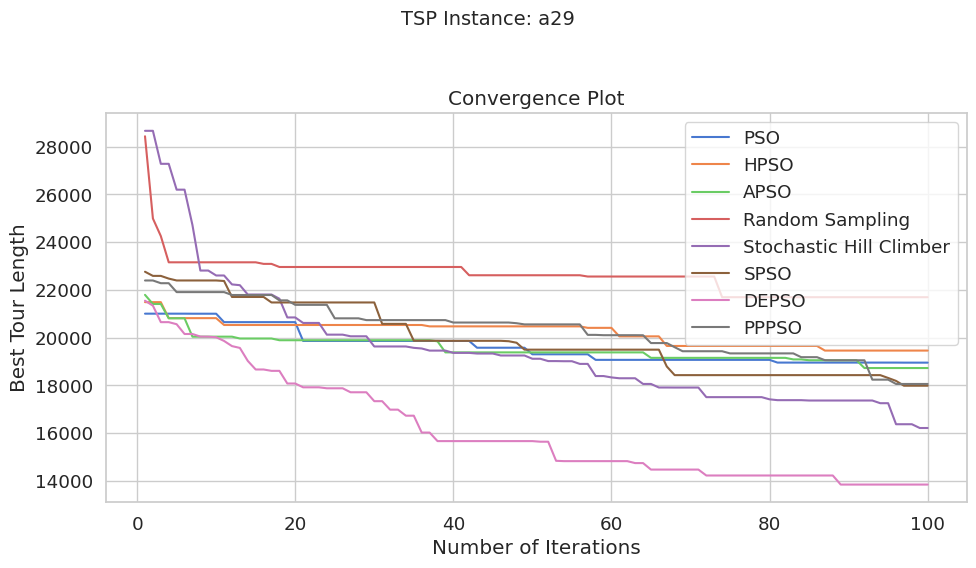

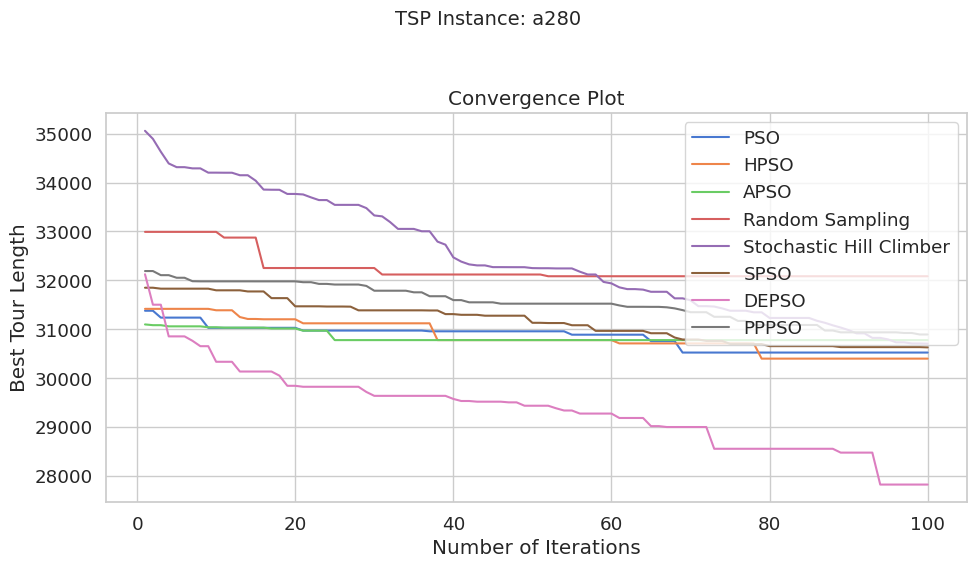

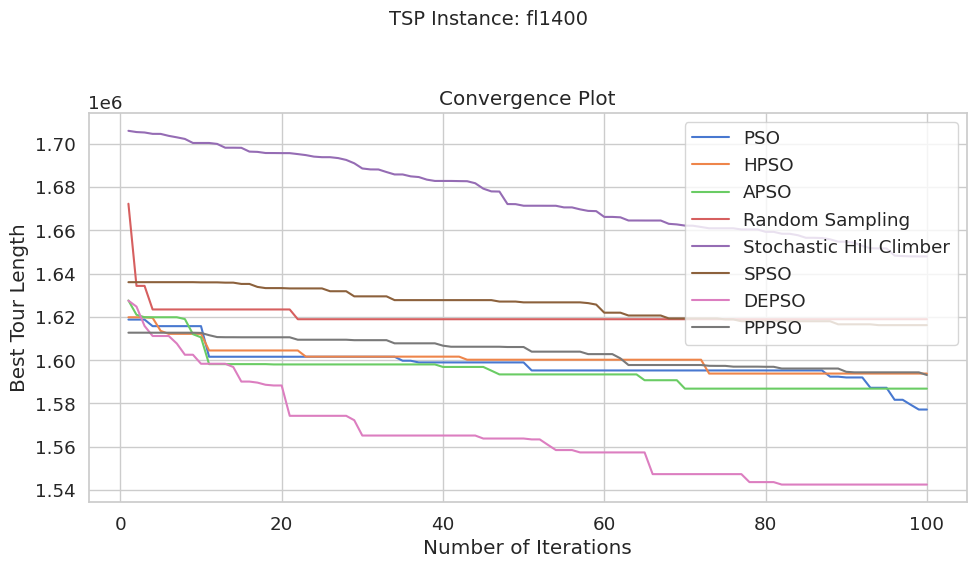

In [9]:
#from utils import *
from utilstest import *
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
# Usage example
tsp_file_path = 'a29.tsp'
csv_file_path = 'a29.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()


experiment = Experiment(tsp_instance, num_runs=2,population_size=50,max_iterations=100, w=0.9, c1=0.1,c2=0.1, w_min=0.1, w_max=0.3, neighborhood_size=2, cr=0.1, f=0.1, fear_factor=0.9)
experiment.run_best_hyperparameter_experiments()

# Usage example
tsp_file_path = 'a280.tsp'
csv_file_path = 'a280_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()


experiment = Experiment(tsp_instance, num_runs=2,population_size=50,max_iterations=100, w=0.9, c1=0.1,c2=0.1, w_min=0.1, w_max=0.3, neighborhood_size=2, cr=0.1, f=0.1, fear_factor=0.9)
experiment.run_best_hyperparameter_experiments()


# Usage example
tsp_file_path = 'fl1400.tsp'
csv_file_path = 'fl1400_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()


experiment = Experiment(tsp_instance, num_runs=2,population_size=50,max_iterations=100, w=0.9, c1=0.1,c2=0.1, w_min=0.1, w_max=0.3, neighborhood_size=2, cr=0.1, f=0.1, fear_factor=0.9)
experiment.run_best_hyperparameter_experiments()


## 3. Experiments
### 3.1. Experiment 1: population size

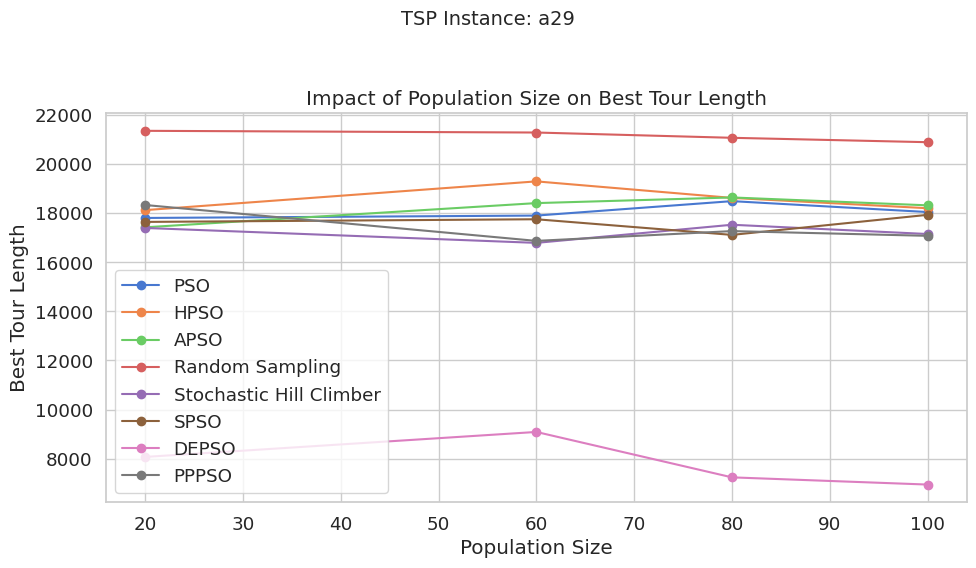

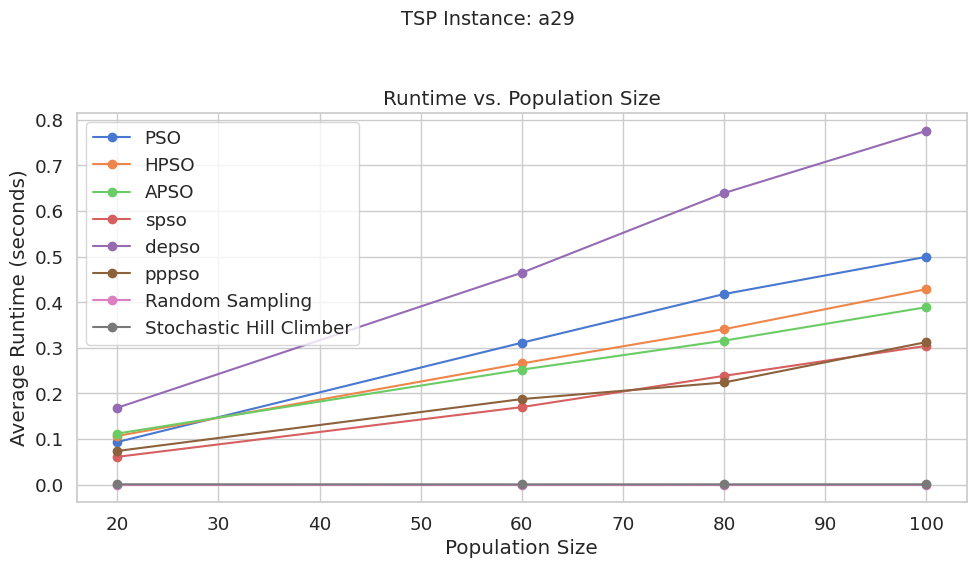

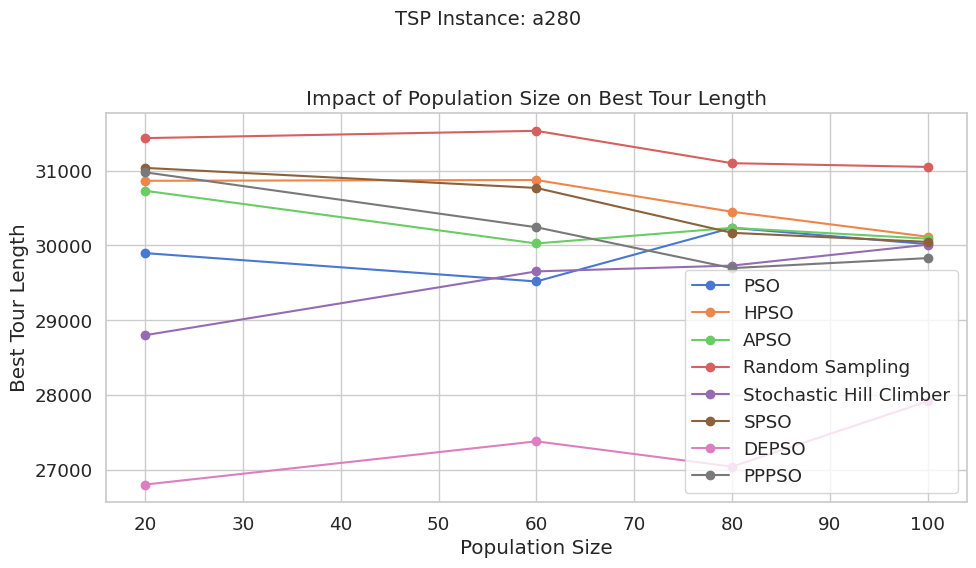

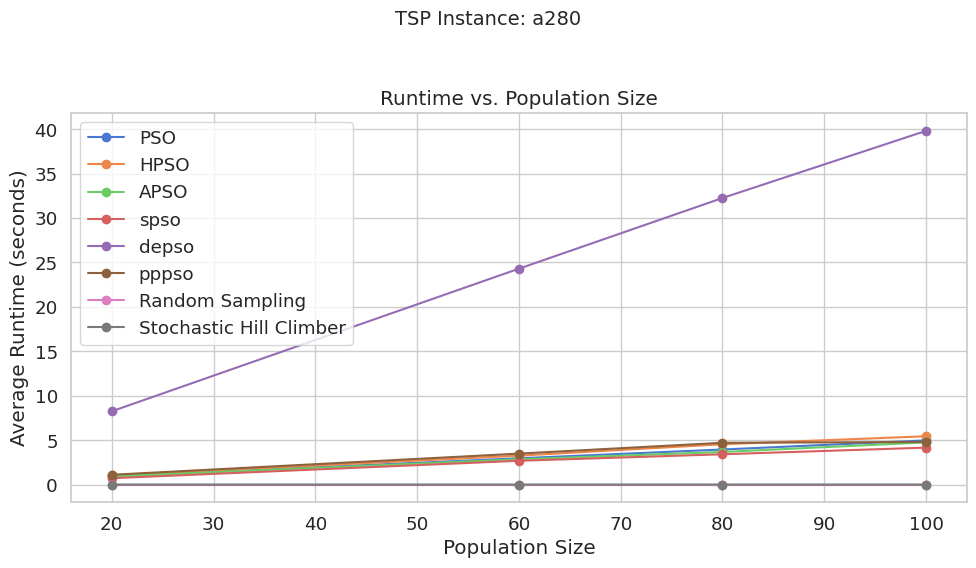

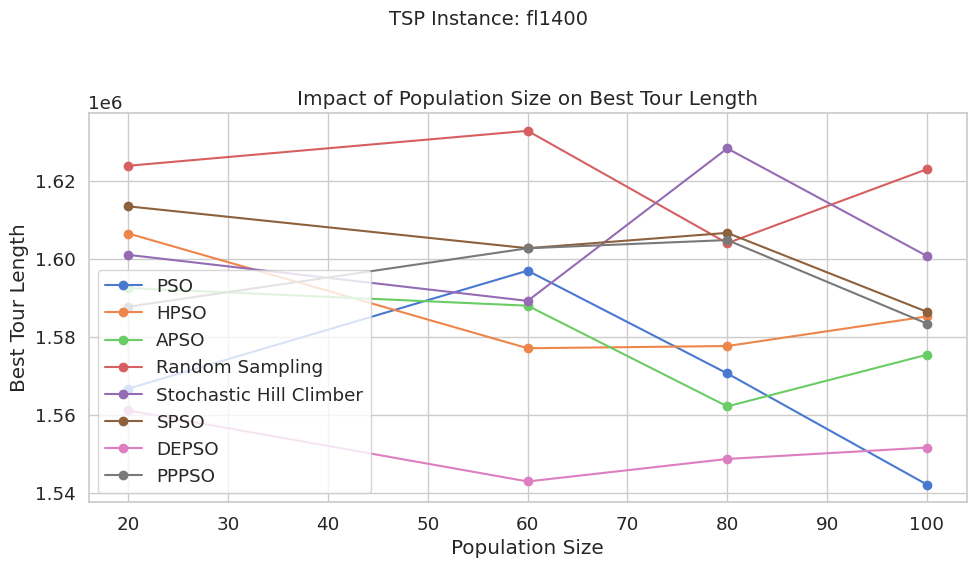

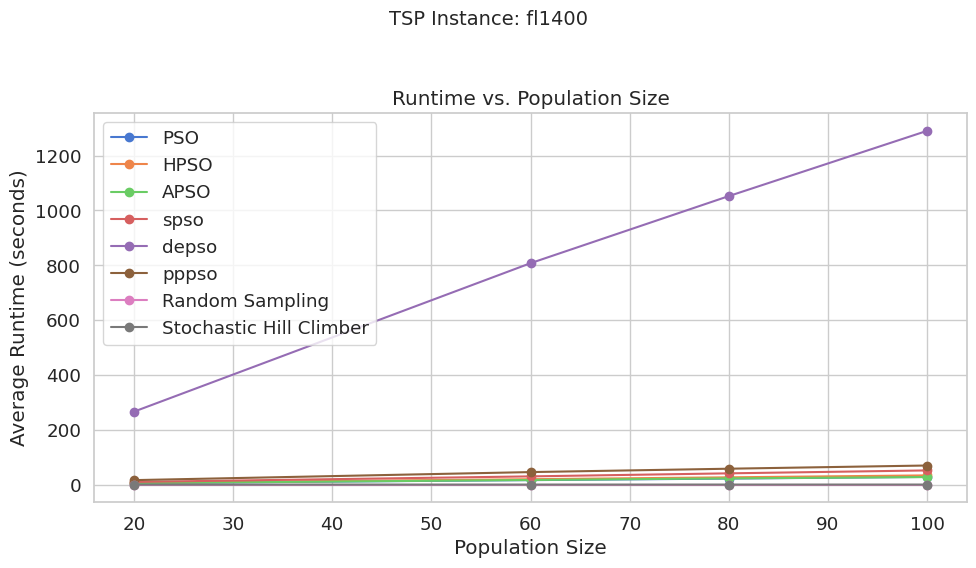

In [10]:
# Usage example
tsp_file_path = 'a29.tsp'
csv_file_path = 'a29.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()


experiment = Experiment(tsp_instance, num_runs=2,population_size=50,max_iterations=100)
experiment.run_population_size_experiments([20,60,80,100])

# Usage example
tsp_file_path = 'a280.tsp'
csv_file_path = 'a280_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()


experiment = Experiment(tsp_instance, num_runs=2,population_size=50,max_iterations=100)
experiment.run_population_size_experiments([20,60,80,100])

# Usage example
tsp_file_path = 'fl1400.tsp'
csv_file_path = 'fl1400_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()


experiment = Experiment(tsp_instance, num_runs=2,population_size=50,max_iterations=100)
experiment.run_population_size_experiments([20,60,80,100])

### 3.2. Experiment 2: Inertia Weight

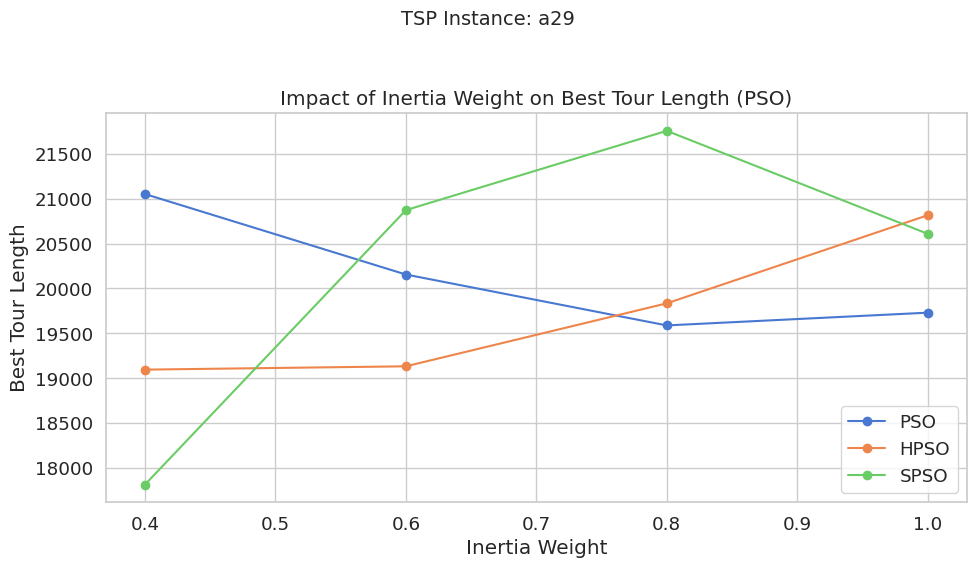

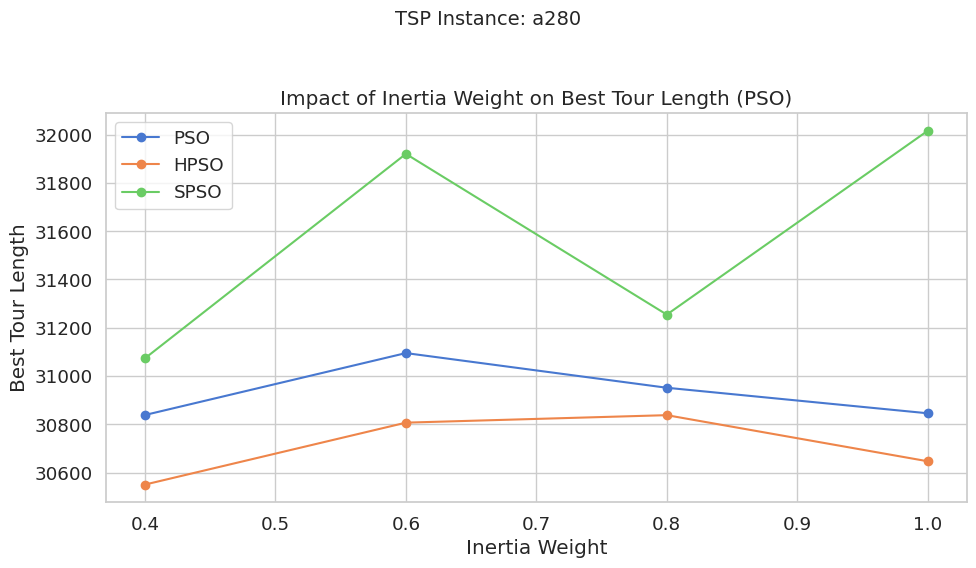

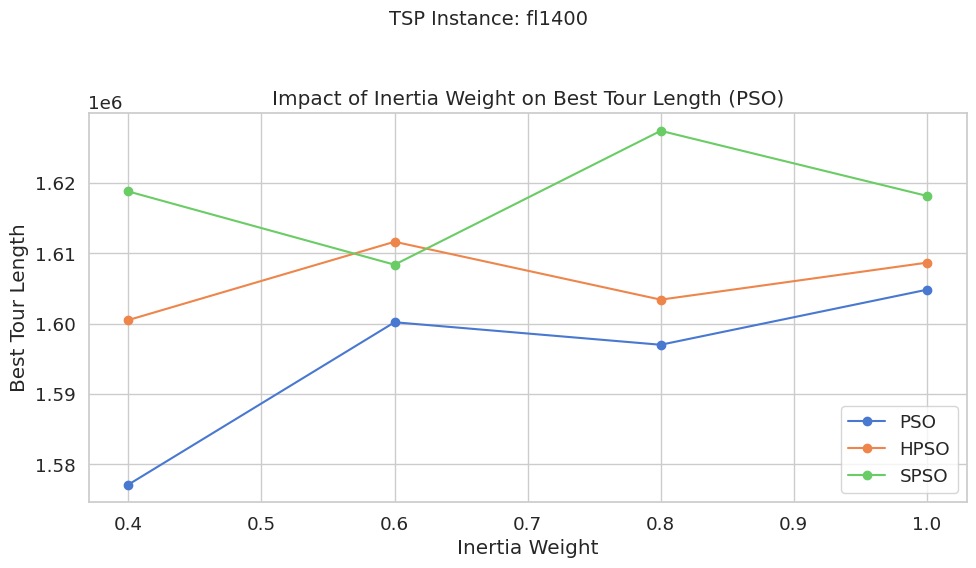

In [11]:
# 1min 11 : runexp parallel run algo sequentially
# Usage example
tsp_file_path = 'a29.tsp'
csv_file_path = 'a29.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()
# Run experiments for different inertia weights
experiment = Experiment(tsp_instance, num_runs=2)
inertia_weights = [0.4, 0.6, 0.8, 1.0]
experiment.run_inertia_weight_experiments(inertia_weights)

# Usage example
tsp_file_path = 'a280.tsp'
csv_file_path = 'a280_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()
# Run experiments for different inertia weights
experiment = Experiment(tsp_instance, num_runs=2)
inertia_weights = [0.4, 0.6, 0.8, 1.0]
experiment.run_inertia_weight_experiments(inertia_weights)

# Usage example
tsp_file_path = 'fl1400.tsp'
csv_file_path = 'fl1400_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()
# Run experiments for different inertia weights
experiment = Experiment(tsp_instance, num_runs=2)
inertia_weights = [0.4, 0.6, 0.8, 1.0]
experiment.run_inertia_weight_experiments(inertia_weights)

### 3.3. Experiment 3: Acceleration Coefficients

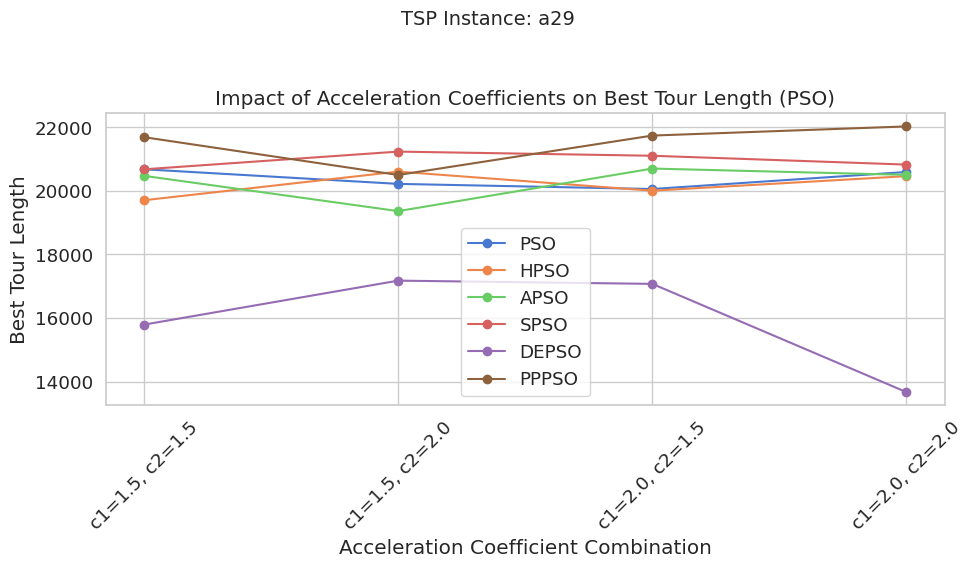

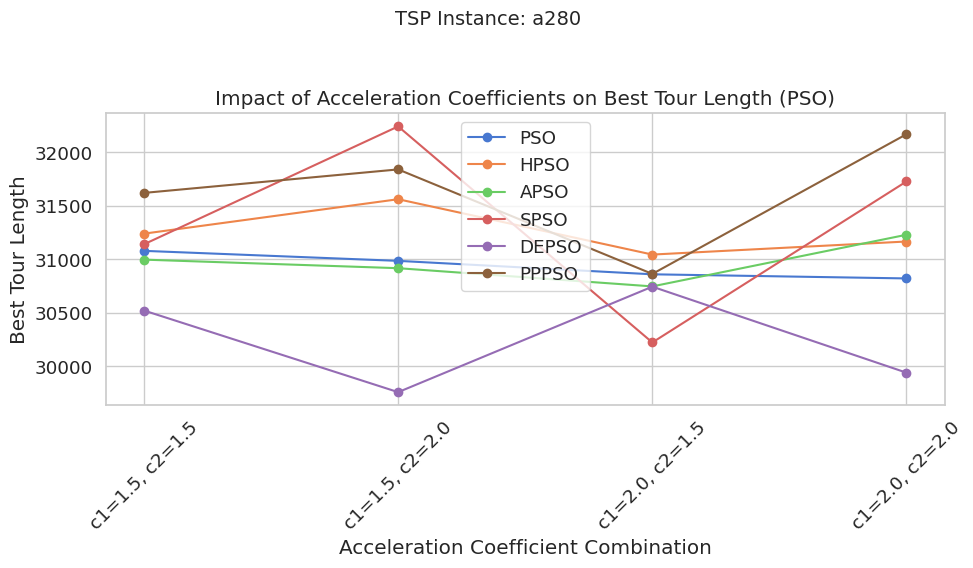

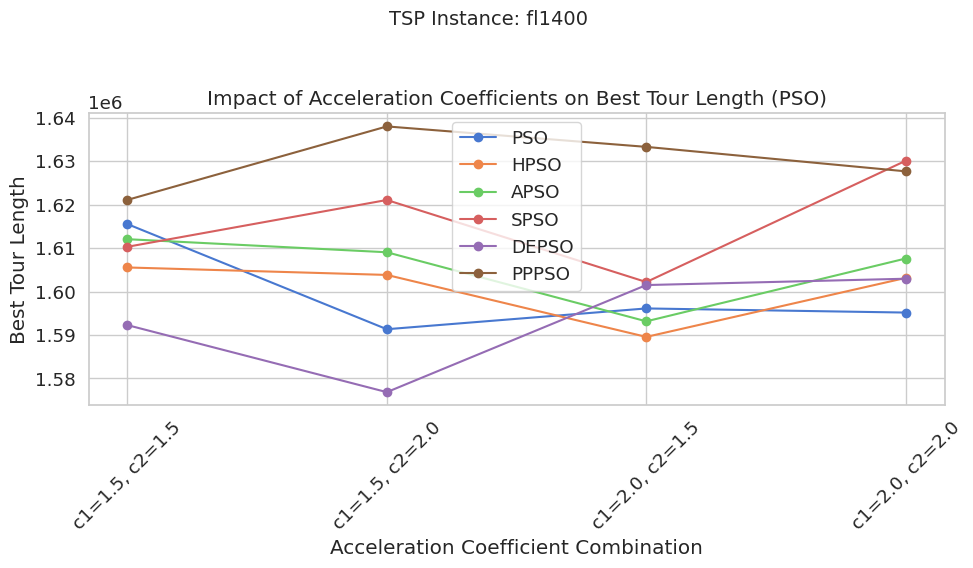

In [12]:
# Usage example
tsp_file_path = 'a29.tsp'
csv_file_path = 'a29.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()
# Run experiments for different acceleration coefficient combinations
coefficient_combinations = [(1.5, 1.5), (1.5, 2.0), (2.0, 1.5), (2.0, 2.0)]
experiment = Experiment(tsp_instance, num_runs=2)
experiment.run_acceleration_coefficients_experiments(coefficient_combinations)

# Usage example
tsp_file_path = 'a280.tsp'
csv_file_path = 'a280_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()
# Run experiments for different acceleration coefficient combinations
coefficient_combinations = [(1.5, 1.5), (1.5, 2.0), (2.0, 1.5), (2.0, 2.0)]
experiment = Experiment(tsp_instance, num_runs=2)
experiment.run_acceleration_coefficients_experiments(coefficient_combinations)


# Usage example
tsp_file_path = 'fl1400.tsp'
csv_file_path = 'fl1400_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()
# Run experiments for different acceleration coefficient combinations
coefficient_combinations = [(1.5, 1.5), (1.5, 2.0), (2.0, 1.5), (2.0, 2.0)]
experiment = Experiment(tsp_instance, num_runs=2)
experiment.run_acceleration_coefficients_experiments(coefficient_combinations)


### 3.4. Experiment 4: w_min and w_max

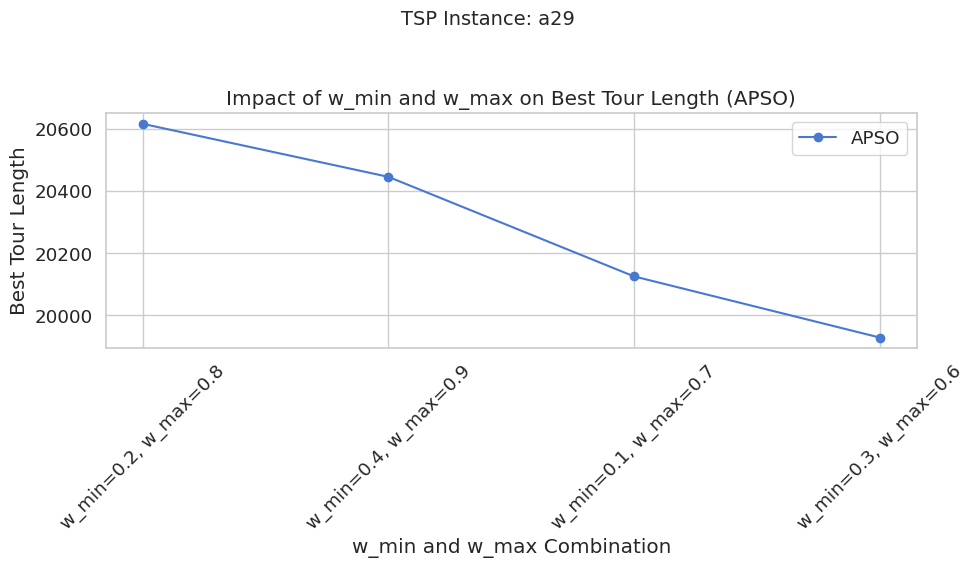

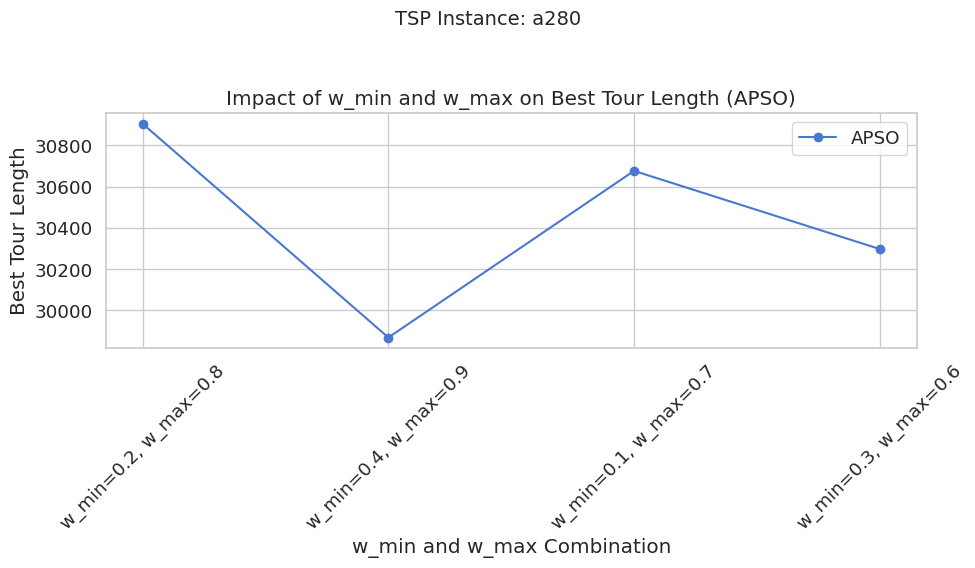

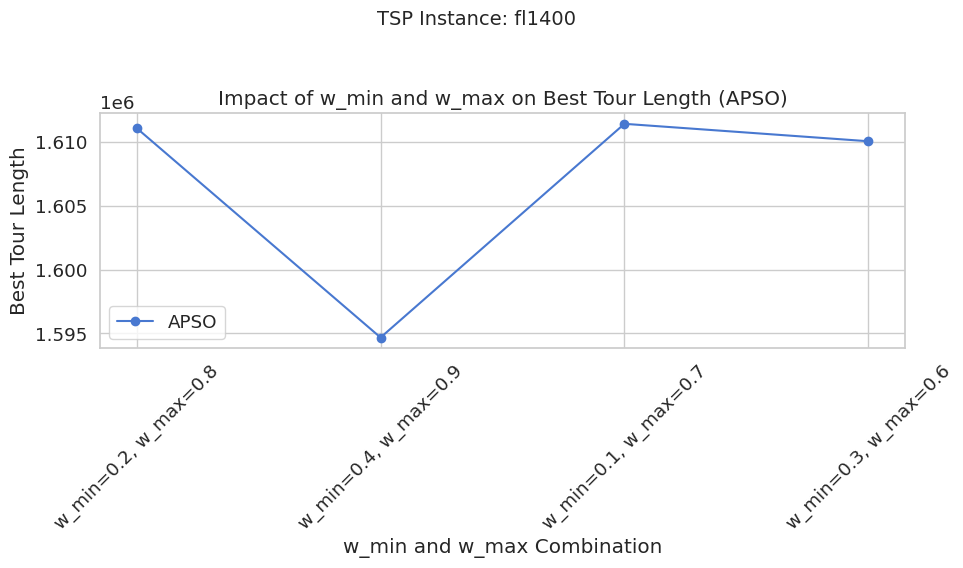

In [13]:
# Usage example
tsp_file_path = 'a29.tsp'
csv_file_path = 'a29.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()
# Run experiments for different w_min and w_max combinations (APSO)
w_min_w_max_combinations = [(0.2, 0.8), (0.4, 0.9), (0.1, 0.7), (0.3, 0.6)]
experiment = Experiment(tsp_instance, num_runs=2)
experiment.run_w_min_w_max_experiments(w_min_w_max_combinations)

# Usage example
tsp_file_path = 'a280.tsp'
csv_file_path = 'a280_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()
# Run experiments for different w_min and w_max combinations (APSO)
w_min_w_max_combinations = [(0.2, 0.8), (0.4, 0.9), (0.1, 0.7), (0.3, 0.6)]
experiment = Experiment(tsp_instance, num_runs=2)
experiment.run_w_min_w_max_experiments(w_min_w_max_combinations)


# Usage example
tsp_file_path = 'fl1400.tsp'
csv_file_path = 'fl1400_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()
# Run experiments for different w_min and w_max combinations (APSO)
w_min_w_max_combinations = [(0.2, 0.8), (0.4, 0.9), (0.1, 0.7), (0.3, 0.6)]
experiment = Experiment(tsp_instance, num_runs=2)
experiment.run_w_min_w_max_experiments(w_min_w_max_combinations)

### 3.5. Experiment 5: Neighborhood Size

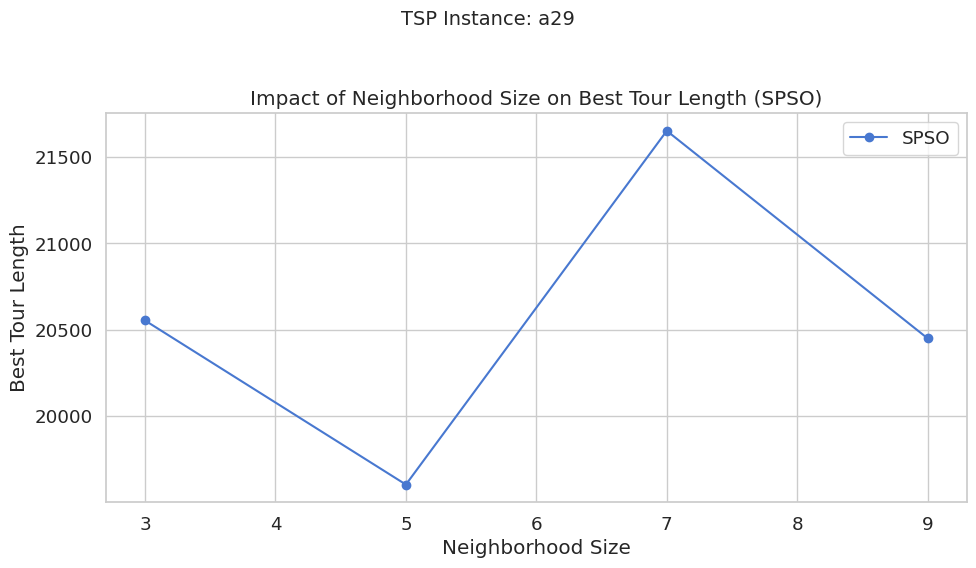

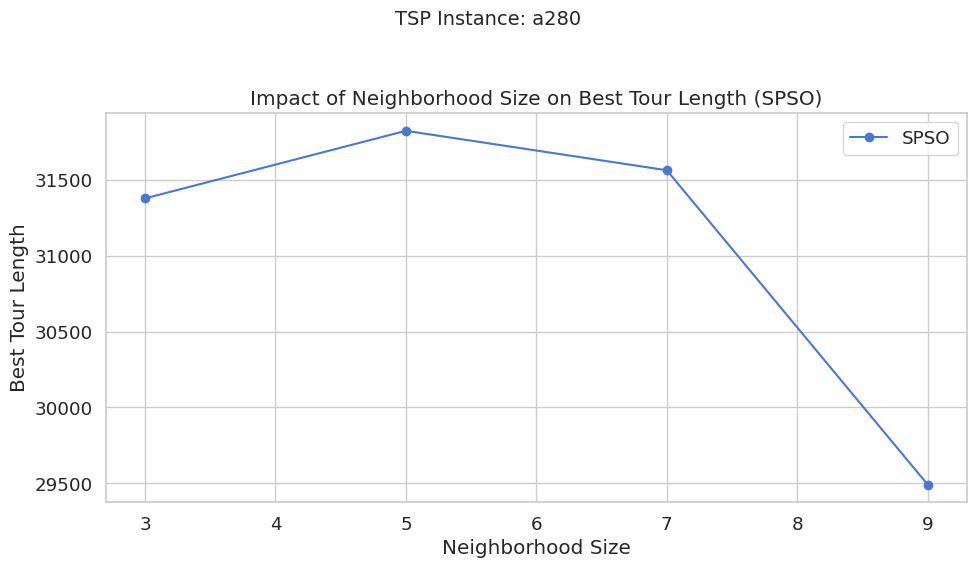

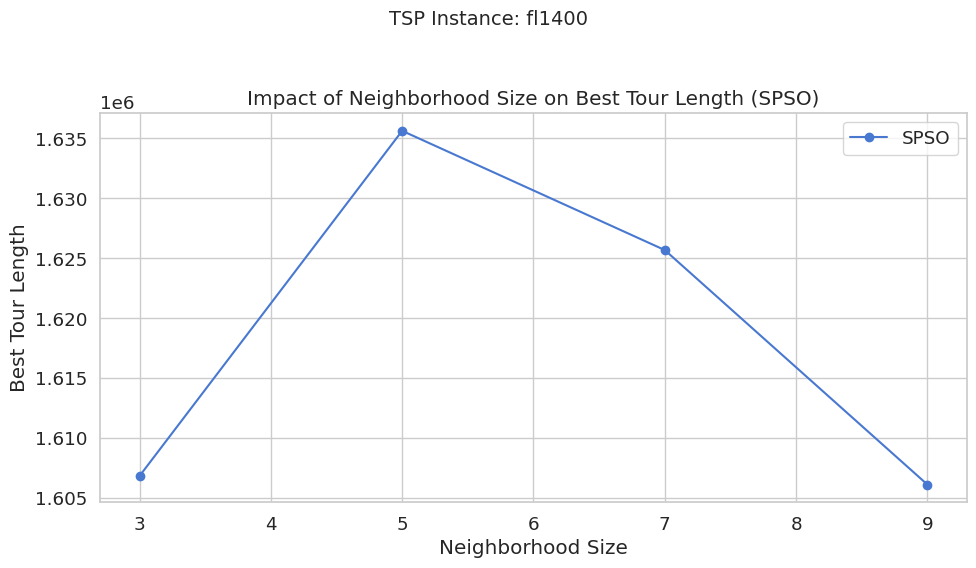

In [14]:
# Usage example
tsp_file_path = 'a29.tsp'
csv_file_path = 'a29.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()
# Run experiments for different neighborhood sizes (SPSO)
neighborhood_sizes = [3, 5, 7, 9]
experiment = Experiment(tsp_instance, num_runs=2)
experiment.run_neighborhood_size_experiments(neighborhood_sizes)

# Usage example
tsp_file_path = 'a280.tsp'
csv_file_path = 'a280_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()
# Run experiments for different neighborhood sizes (SPSO)
neighborhood_sizes = [3, 5, 7, 9]
experiment = Experiment(tsp_instance, num_runs=2)
experiment.run_neighborhood_size_experiments(neighborhood_sizes)

# Usage example
tsp_file_path = 'fl1400.tsp'
csv_file_path = 'fl1400_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()
# Run experiments for different neighborhood sizes (SPSO)
neighborhood_sizes = [3, 5, 7, 9]
experiment = Experiment(tsp_instance, num_runs=2)
experiment.run_neighborhood_size_experiments(neighborhood_sizes)



### 3.6. Experiment 6: Crossover Rate and Mutation Rate

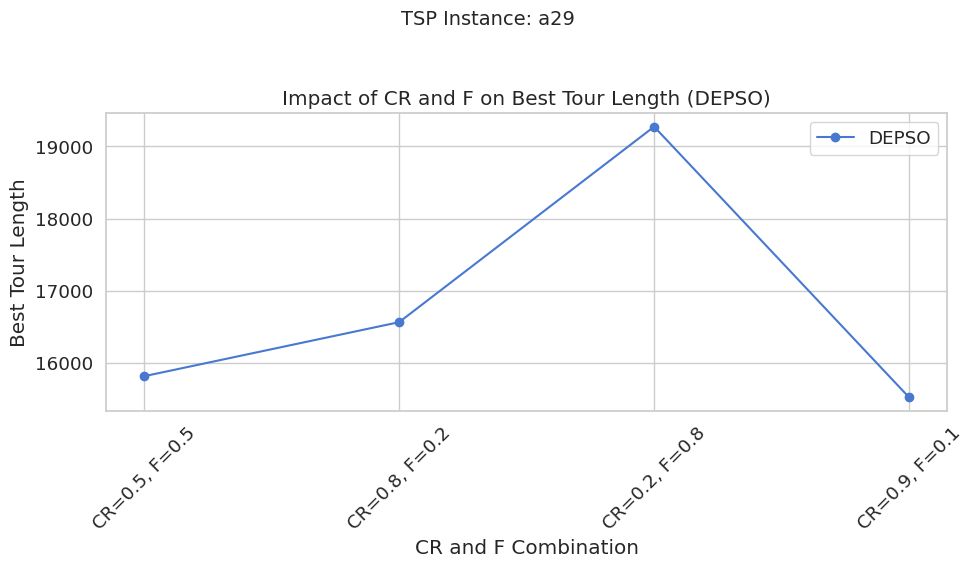

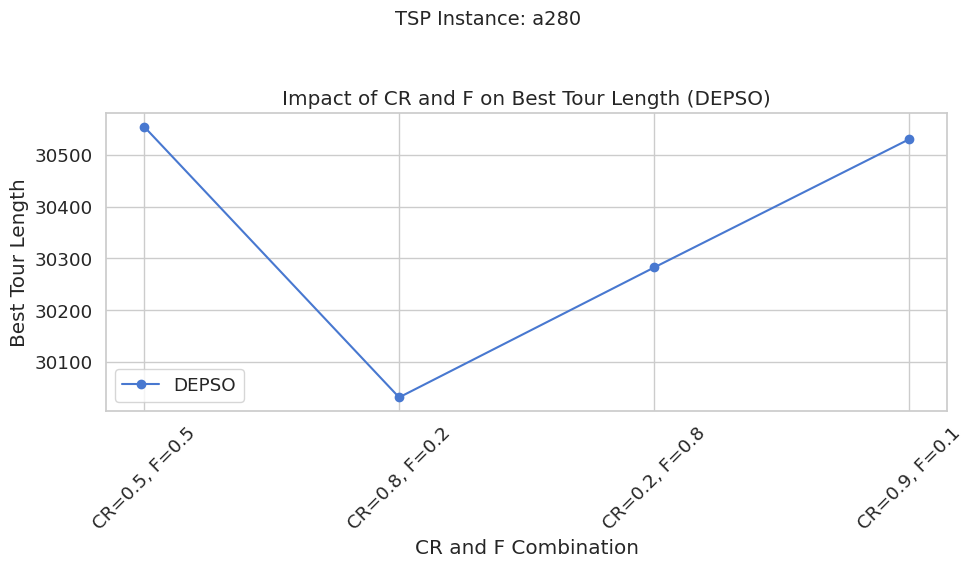

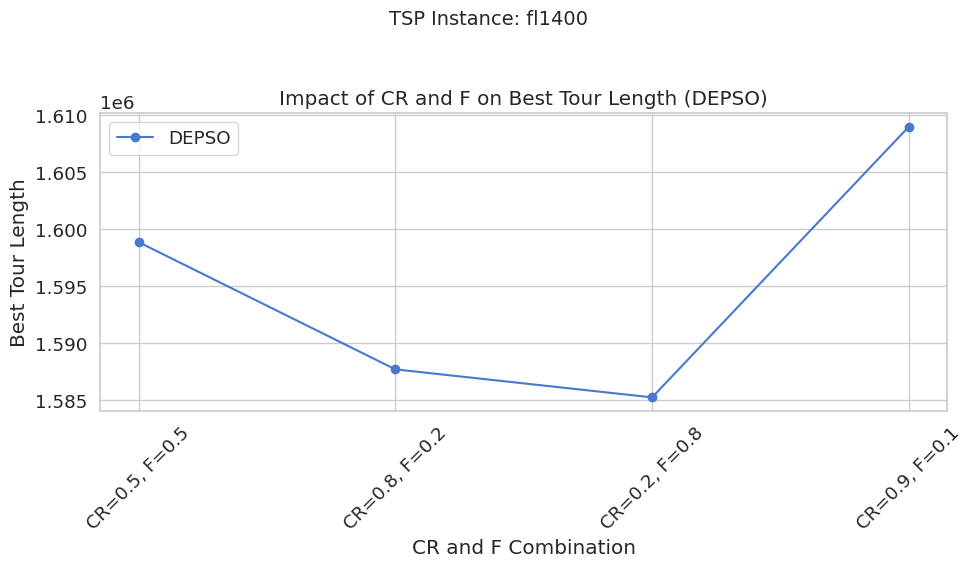

In [15]:
# Usage example
tsp_file_path = 'a29.tsp'
csv_file_path = 'a29.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()
# Run experiments for different CR and F combinations (DEPSO)
cr_f_combinations = [(0.5, 0.5), (0.8, 0.2), (0.2, 0.8), (0.9, 0.1)]
experiment = Experiment(tsp_instance, num_runs=2)
experiment.run_cr_f_experiments(cr_f_combinations)

# Usage example
tsp_file_path = 'a280.tsp'
csv_file_path = 'a280_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()
# Run experiments for different CR and F combinations (DEPSO)
cr_f_combinations = [(0.5, 0.5), (0.8, 0.2), (0.2, 0.8), (0.9, 0.1)]
experiment = Experiment(tsp_instance, num_runs=2)
experiment.run_cr_f_experiments(cr_f_combinations)

# Usage example
tsp_file_path = 'fl1400.tsp'
csv_file_path = 'fl1400_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()
# Run experiments for different CR and F combinations (DEPSO)
cr_f_combinations = [(0.5, 0.5), (0.8, 0.2), (0.2, 0.8), (0.9, 0.1)]
experiment = Experiment(tsp_instance, num_runs=2)
experiment.run_cr_f_experiments(cr_f_combinations)

### 3.7. Experiment 7: Fear Factor

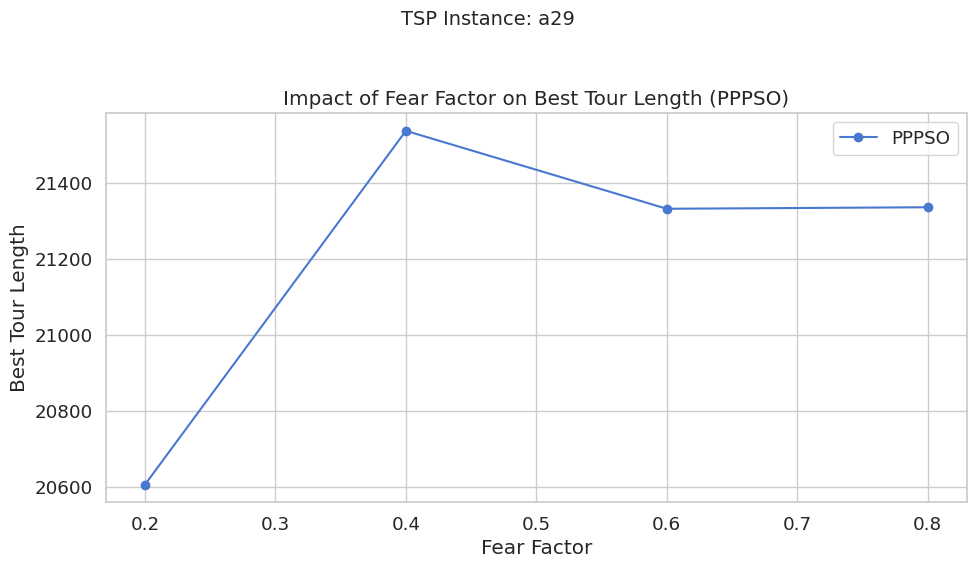

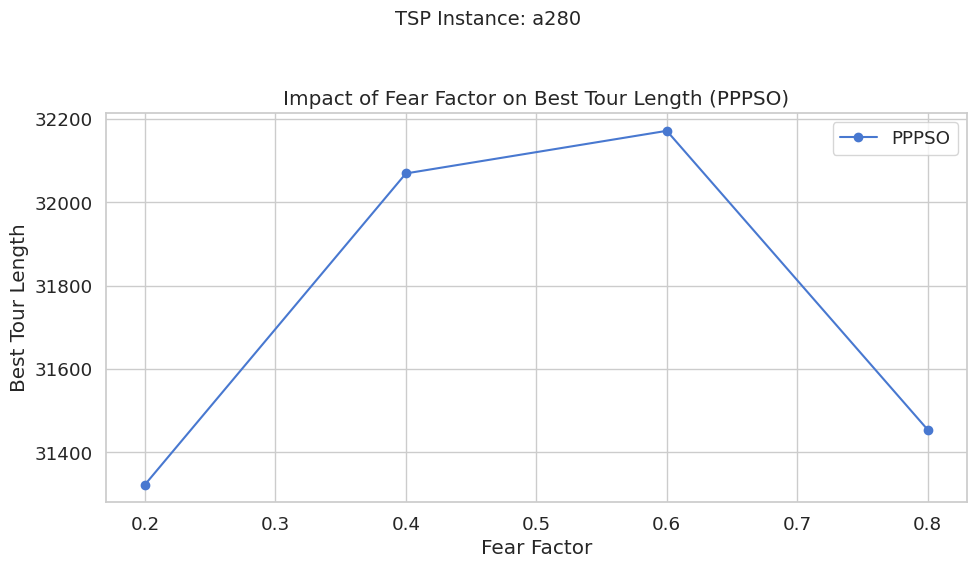

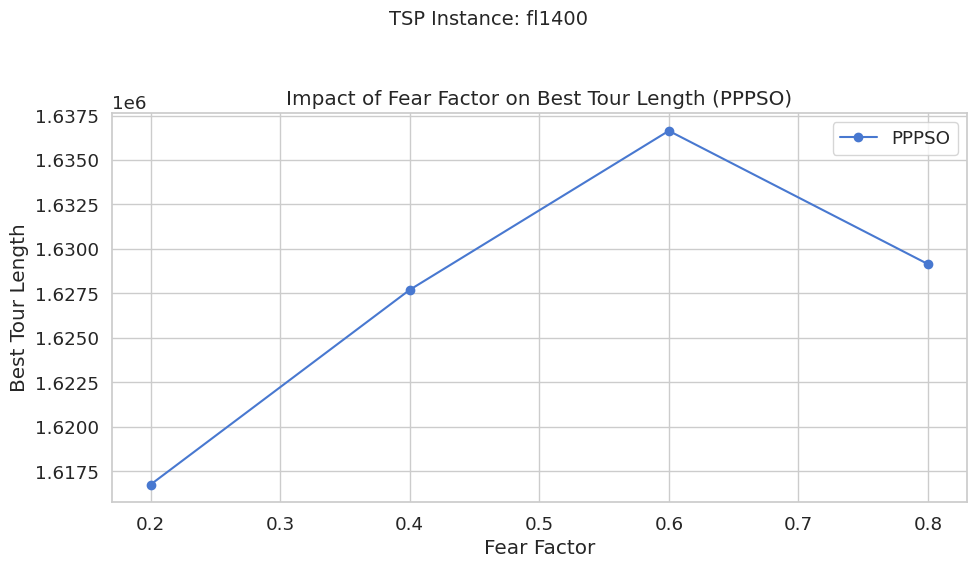

In [16]:
# Usage example
tsp_file_path = 'a29.tsp'
csv_file_path = 'a29.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()
# Run experiments for different fear factors (PPPSO)
fear_factors = [0.2, 0.4, 0.6, 0.8]
experiment = Experiment(tsp_instance, num_runs=2)
experiment.run_fear_factor_experiments(fear_factors)

# Usage example
tsp_file_path = 'a280.tsp'
csv_file_path = 'a280_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()
# Run experiments for different fear factors (PPPSO)
fear_factors = [0.2, 0.4, 0.6, 0.8]
experiment = Experiment(tsp_instance, num_runs=2)
experiment.run_fear_factor_experiments(fear_factors)

# Usage example
tsp_file_path = 'fl1400.tsp'
csv_file_path = 'fl1400_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()
# Run experiments for different fear factors (PPPSO)
fear_factors = [0.2, 0.4, 0.6, 0.8]
experiment = Experiment(tsp_instance, num_runs=2)
experiment.run_fear_factor_experiments(fear_factors)


### 3.8. Experiment 8: max_iterations

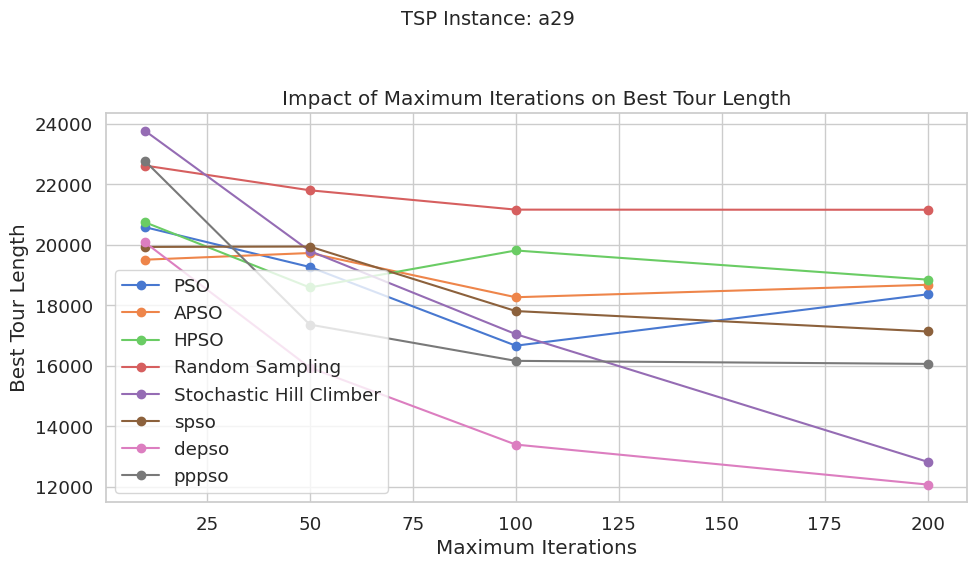

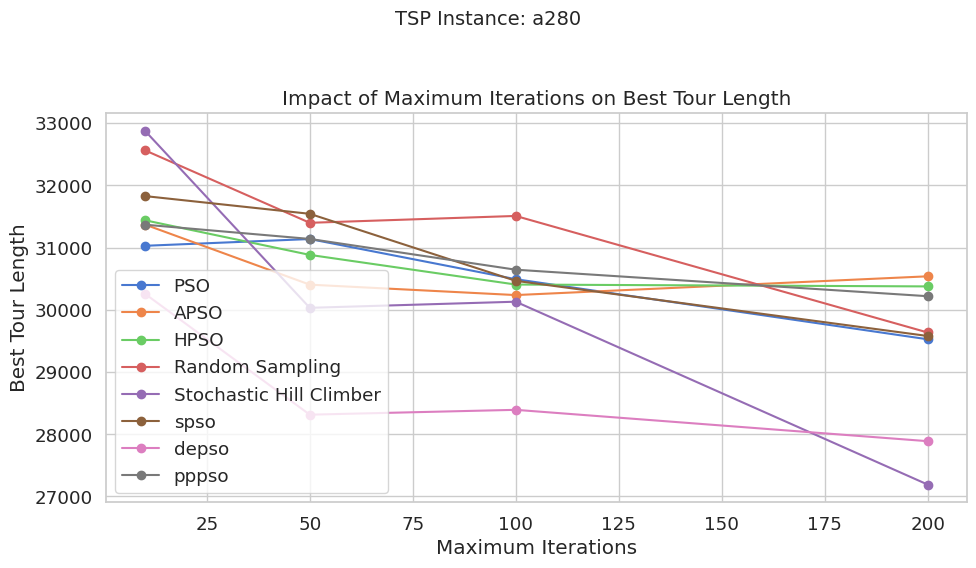

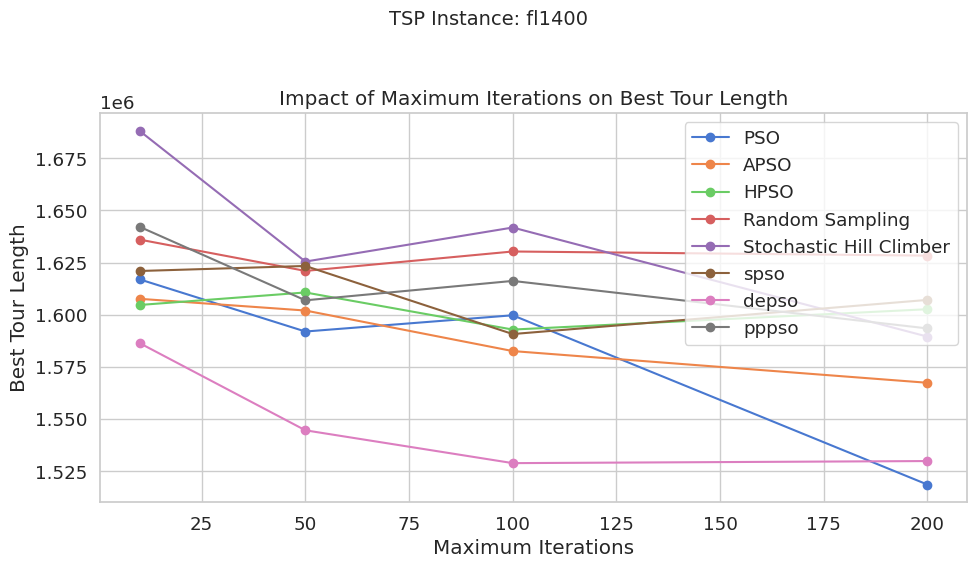

In [17]:
# Usage example
tsp_file_path = 'a29.tsp'
csv_file_path = 'a29.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()


experiment = Experiment(tsp_instance, num_runs=2,population_size=25,max_iterations=10, w=0.9, c1=0.1,c2=0.1, w_min=0.1, w_max=0.3, neighborhood_size=2, cr=0.1, f=0.1, fear_factor=0.9)
experiment.max_iterations_experiments([10,50,100,200])

# Usage example
tsp_file_path = 'a280.tsp'
csv_file_path = 'a280_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()


experiment = Experiment(tsp_instance, num_runs=2,population_size=25,max_iterations=10, w=0.9, c1=0.1,c2=0.1, w_min=0.1, w_max=0.3, neighborhood_size=2, cr=0.1, f=0.1, fear_factor=0.9)
experiment.max_iterations_experiments([10,50,100,200])

# Usage example
tsp_file_path = 'fl1400.tsp'
csv_file_path = 'fl1400_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()


experiment = Experiment(tsp_instance, num_runs=2,population_size=25,max_iterations=10, w=0.9, c1=0.1,c2=0.1, w_min=0.1, w_max=0.3, neighborhood_size=2, cr=0.1, f=0.1, fear_factor=0.9)
experiment.max_iterations_experiments([10,50,100,200])




## 4. Conclusion

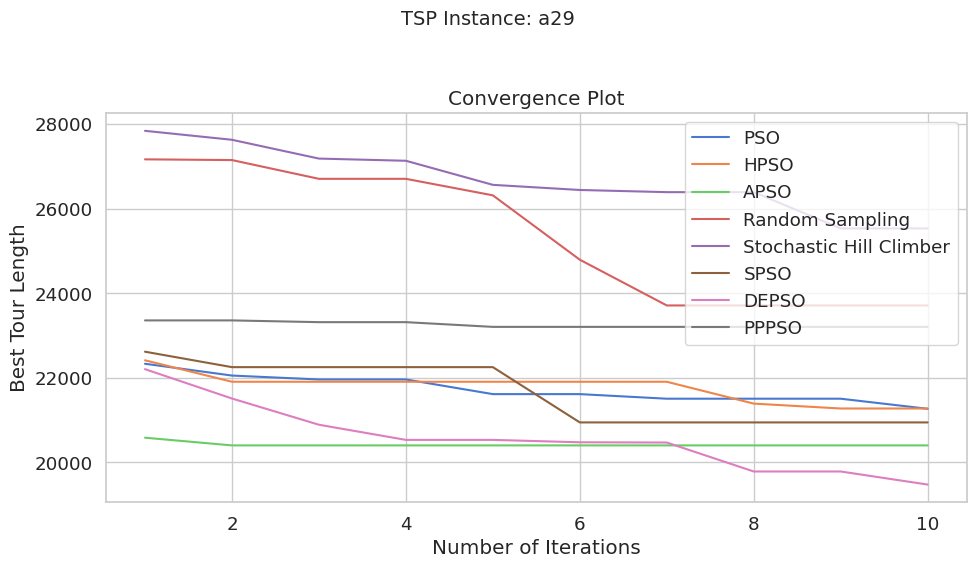

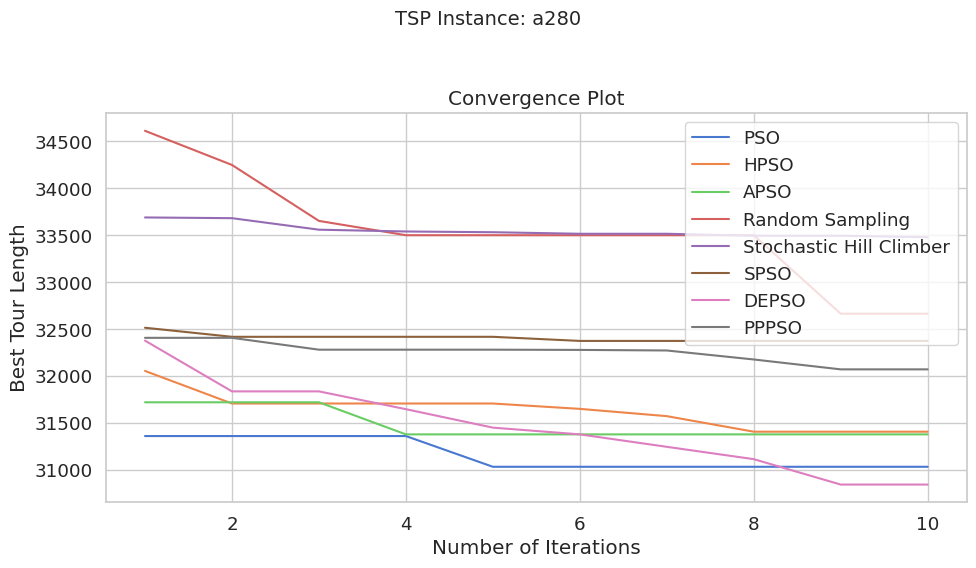

In [18]:
# Usage example
tsp_file_path = 'a29.tsp'
csv_file_path = 'a29.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()


experiment = Experiment(tsp_instance, num_runs=2,population_size=25,max_iterations=10, w=0.9, c1=0.1,c2=0.1, w_min=0.1, w_max=0.3, neighborhood_size=2, cr=0.1, f=0.1, fear_factor=0.9)
experiment.run_best_hyperparameter_experiments()


# Usage example
tsp_file_path = 'a280.tsp'
csv_file_path = 'a280_distance_matrix.csv'

tsp_instance = ProcessData(tsp_file_path, csv_file_path)
plotter = PrettyPlotting()


experiment = Experiment(tsp_instance, num_runs=2,population_size=25,max_iterations=10, w=0.9, c1=0.1,c2=0.1, w_min=0.1, w_max=0.3, neighborhood_size=2, cr=0.1, f=0.1, fear_factor=0.9)
experiment.run_best_hyperparameter_experiments()

